<a href="https://colab.research.google.com/github/DataScienceLab-DSLABI/Active-Learning-Anomaly-Detection/blob/main/%5BDS_Lab_I%5D_First_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data

In [3]:
!git clone https://github.com/icsdataset/hai
!gunzip *.gz

Cloning into 'hai'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 329 (delta 37), reused 66 (delta 15), pack-reused 222
Receiving objects: 100% (329/329), 519.79 MiB | 18.94 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Updating files: 100% (72/72), done.
Filtering content: 100% (20/20), 1.65 GiB | 42.43 MiB/s, done.
gzip: *.gz: No such file or directory


In [4]:
%cd /content/hai/hai-22.04
!git lfs pull

/content/hai/hai-22.04


In [5]:
df_path = '/content/hai/hai-22.04/'

df_train1 = pd.read_csv(df_path+'train1.csv')
df_train2 = pd.read_csv(df_path+'train2.csv')
df_train3 = pd.read_csv(df_path+'train3.csv')
df_train4 = pd.read_csv(df_path+'train4.csv')
df_train5 = pd.read_csv(df_path+'train5.csv')
df_train6 = pd.read_csv(df_path+'train6.csv')

df_test1 = pd.read_csv(df_path+'test1.csv')
df_test2 = pd.read_csv(df_path+'test2.csv')
df_test3 = pd.read_csv(df_path+'test3.csv')
df_test4 = pd.read_csv(df_path+'test4.csv')

In [6]:
df_train = pd.concat([df_train1, df_train2, df_train3, df_train4, df_train5, df_train6], ignore_index=True)
df_test = pd.concat([df_test1, df_test2, df_test3, df_test4], ignore_index=True)
df = pd.concat([df_train, df_test], ignore_index=True)

## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365602 entries, 0 to 1365601
Data columns (total 88 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   timestamp     1365602 non-null  object 
 1   P1_B2004      1365602 non-null  float64
 2   P1_B2016      1365602 non-null  float64
 3   P1_B3004      1365602 non-null  float64
 4   P1_B3005      1365602 non-null  float64
 5   P1_B4002      1365602 non-null  float64
 6   P1_B4005      1365602 non-null  float64
 7   P1_B400B      1365602 non-null  float64
 8   P1_B4022      1365602 non-null  float64
 9   P1_FCV01D     1365602 non-null  float64
 10  P1_FCV01Z     1365602 non-null  float64
 11  P1_FCV02D     1365602 non-null  float64
 12  P1_FCV02Z     1365602 non-null  float64
 13  P1_FCV03D     1365602 non-null  float64
 14  P1_FCV03Z     1365602 non-null  float64
 15  P1_FT01       1365602 non-null  float64
 16  P1_FT01Z      1365602 non-null  float64
 17  P1_FT02       1365602 non-n

In [8]:
df_train.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-11 10:00:00,0.08771,0.88504,476.76703,1014.79321,26.92264,15.07713,595.06104,30.08042,15.50464,...,7.08818,276.40338,-0.00087,14742,276.45758,267.90363,8.90254,9914,27170,0
1,2021-07-11 10:00:01,0.08771,0.88619,476.76703,1014.79321,26.92264,14.97197,531.50317,30.08423,16.20023,...,7.08818,276.18634,0.00058,14781,278.91705,268.95258,8.90254,9914,27171,0
2,2021-07-11 10:00:02,0.08771,0.88836,476.76703,1014.79321,26.92264,14.90129,451.06253,30.09148,16.53352,...,7.08818,279.85754,-0.00072,14831,278.89899,269.76636,8.90254,9914,27170,0
3,2021-07-11 10:00:03,0.08771,0.89214,476.76703,1014.79321,26.92264,14.82246,404.38739,30.10407,16.30247,...,7.08818,281.50317,0.00101,14917,280.49048,271.64716,8.90254,9914,27171,0
4,2021-07-11 10:00:04,0.08771,0.89191,476.76703,1014.79321,26.92264,14.73087,382.53925,30.10331,15.79237,...,7.08818,281.34039,0.00043,14997,283.47437,272.80457,8.90254,9914,27171,0


In [9]:
df_test.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-10 00:00:01,0.059445,1.04366,431.328095,1034.712769,27.736847,14.91310,386.51172,31.52100,15.09755,...,0.716042,356.64423,0.00058,18131,292.86029,334.58112,20.989594,10000,27181,0
1,2021-07-10 00:00:02,0.059445,1.04217,431.328095,1034.712769,27.736847,14.95540,411.33905,31.51756,14.71477,...,0.716042,352.08698,-0.00282,18111,295.82605,332.97162,20.989594,9999,27174,0
2,2021-07-10 00:00:03,0.059445,1.03920,431.328095,1034.712769,27.736847,14.99200,438.15259,31.50269,14.30731,...,0.716042,347.63818,-0.00398,18100,300.02173,332.15784,20.989594,9999,27172,0
3,2021-07-10 00:00:04,0.059445,1.03222,431.328095,1034.712769,27.736847,15.01359,465.95908,31.47942,14.54943,...,0.716042,340.33203,-0.00152,18000,302.10144,330.96429,20.989594,9999,27168,0
4,2021-07-10 00:00:05,0.059445,1.02947,431.328095,1034.712769,27.736847,15.04767,452.05582,31.47942,15.24461,...,0.716042,335.17798,0.00072,17852,305.03113,329.02917,20.989594,9999,27172,0


In [10]:
df_train.Attack.value_counts() #attack dist in train

0    1004402
Name: Attack, dtype: int64

In [11]:
df_test.Attack.value_counts() #attack dist in test

0    349170
1     12030
Name: Attack, dtype: int64

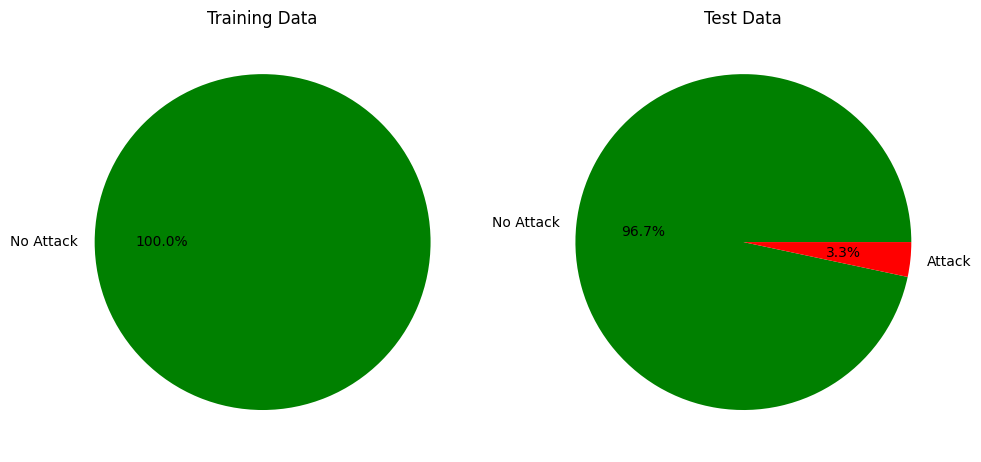

In [12]:
train_counts, test_counts = df_train['Attack'].value_counts(normalize=True), df_test['Attack'].value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(train_counts, labels=['No Attack'], autopct='%1.1f%%', colors=['green', 'red'])
axes[0].set_title('Training Data')
axes[1].pie(test_counts, labels=['No Attack', 'Attack'], autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title('Test Data')
plt.tight_layout()

## Preprocessing

### Nulls check

In [13]:
null_values = df.isnull().sum()
columns_with_null = null_values[null_values > 0]
print("There is ", len(columns_with_null)," columns with Null values which are: ", list(columns_with_null))

There is  0  columns with Null values which are:  []


### duplicates check

In [14]:
duplicate_rows = df[df.duplicated()]
duplicate_columns = df.columns[df.columns.duplicated()]
print("Number of rows/columns with duplicate values: %d/%d"%(len(duplicate_rows),len(duplicate_columns)))

Number of rows/columns with duplicate values: 0/0


### single value columns check

In [15]:
single_value_columns = df.columns[df.nunique() == 1]
print("Number of columns with one unique value:", len(single_value_columns))
print("Columns with only one unique value:", list(single_value_columns))

Number of columns with one unique value: 16
Columns with only one unique value: ['P1_PIT01_HH', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P2_RTR', 'P2_TripEx', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04']


In [16]:
df.drop(columns=single_value_columns, inplace=True)

### highly correlated columns check

In [17]:
correlation_matrix = df.corr().abs()
threshold = 0.9

highly_correlated_pairs = (correlation_matrix > threshold) & (correlation_matrix < 1)

correlated_columns = []
for col in highly_correlated_pairs.columns:
    correlated_cols = highly_correlated_pairs.index[highly_correlated_pairs[col]].tolist()
    if correlated_cols:
        correlated_columns.extend([(col, correlated_col) for correlated_col in correlated_cols])

<ipython-input-17-c52d3bb721e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().abs()


In [18]:
print("Number of correlated columns: ", len(correlated_columns))
print("Highly correlated columns:")
for pair in correlated_columns:
    print(pair)

Number of correlated columns:  130
Highly correlated columns:
('P1_B2016', 'P4_ST_GOV')
('P1_B2016', 'P4_ST_PO')
('P1_B3004', 'P1_LIT01')
('P1_B3005', 'P1_FT03')
('P1_B3005', 'P1_FT03Z')
('P1_B4002', 'P1_B4005')
('P1_B4002', 'P1_B400B')
('P1_B4002', 'P1_B4022')
('P1_B4002', 'P1_FCV01D')
('P1_B4002', 'P1_FCV01Z')
('P1_B4002', 'P1_FT02')
('P1_B4002', 'P1_FT02Z')
('P1_B4005', 'P1_B4002')
('P1_B4005', 'P1_B400B')
('P1_B4005', 'P1_B4022')
('P1_B4005', 'P1_FCV01D')
('P1_B4005', 'P1_FCV01Z')
('P1_B4005', 'P1_FCV02Z')
('P1_B4005', 'P1_FT02')
('P1_B4005', 'P1_FT02Z')
('P1_B400B', 'P1_B4002')
('P1_B400B', 'P1_B4005')
('P1_B400B', 'P1_B4022')
('P1_B400B', 'P1_FCV01D')
('P1_B400B', 'P1_FCV01Z')
('P1_B400B', 'P1_FCV02Z')
('P1_B400B', 'P1_FT02')
('P1_B400B', 'P1_FT02Z')
('P1_B4022', 'P1_B4002')
('P1_B4022', 'P1_B4005')
('P1_B4022', 'P1_B400B')
('P1_B4022', 'P1_FCV01D')
('P1_B4022', 'P1_FCV01Z')
('P1_B4022', 'P1_FT02')
('P1_B4022', 'P1_FT02Z')
('P1_FCV01D', 'P1_B4002')
('P1_FCV01D', 'P1_B4005')
('P1_

In [19]:
columns_to_drop = []
for pair in correlated_columns:
    if pair[0] not in columns_to_drop:
        columns_to_drop.append(pair[1])

df.drop(columns=columns_to_drop, inplace=True)
print("%d highly correlated columns removed."%len(columns_to_drop))
print("Columns droped:", list(columns_to_drop))

34 highly correlated columns removed.
Columns droped: ['P4_ST_GOV', 'P4_ST_PO', 'P1_LIT01', 'P1_FT03', 'P1_FT03Z', 'P1_B4005', 'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FT02', 'P1_FT02Z', 'P1_B4005', 'P1_B400B', 'P1_FT02Z', 'P1_FCV03Z', 'P1_FT01Z', 'P1_LCV01Z', 'P1_PCV01Z', 'P4_ST_PT01', 'P4_ST_TT01', 'P2_AutoGO', 'P2_MASW', 'P2_MASW_Lamp', 'P2_ManualGO', 'P2_SCO', 'P2_OnOff', 'P2_SCO', 'P2_VIBTR03', 'P2_VIBTR04', 'P4_HT_PO', 'P3_LL01', 'P4_ST_GOV', 'P4_ST_PO']


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365602 entries, 0 to 1365601
Data columns (total 44 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   timestamp     1365602 non-null  object 
 1   P1_B2004      1365602 non-null  float64
 2   P1_B2016      1365602 non-null  float64
 3   P1_B3004      1365602 non-null  float64
 4   P1_B3005      1365602 non-null  float64
 5   P1_B4002      1365602 non-null  float64
 6   P1_FCV02D     1365602 non-null  float64
 7   P1_FCV02Z     1365602 non-null  float64
 8   P1_FCV03D     1365602 non-null  float64
 9   P1_FT01       1365602 non-null  float64
 10  P1_LCV01D     1365602 non-null  float64
 11  P1_PCV01D     1365602 non-null  float64
 12  P1_PCV02D     1365602 non-null  float64
 13  P1_PCV02Z     1365602 non-null  float64
 14  P1_PIT01      1365602 non-null  float64
 15  P1_PIT02      1365602 non-null  float64
 16  P1_PP04       1365602 non-null  float64
 17  P1_PP04SP     1365602 non-n

### encoding

In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['fractional_hour'] = df['timestamp'].dt.hour + df['timestamp'].dt.minute / 60 + df['timestamp'].dt.second / 3600

df['year_sin'] = np.sin(2 * np.pi * df['timestamp'].dt.year / 365)
df['year_cos'] = np.cos(2 * np.pi * df['timestamp'].dt.year / 365)
df['month_sin'] = np.sin(2 * np.pi * df['timestamp'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['timestamp'].dt.month / 12)
df['day_of_month_sin'] = np.sin(2 * np.pi * df['timestamp'].dt.day / 31)
df['day_of_month_cos'] = np.cos(2 * np.pi * df['timestamp'].dt.day / 31)
df['hour_sin'] = np.sin(2 * np.pi * df['fractional_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['fractional_hour'] / 24)

df.drop(columns=['timestamp', 'fractional_hour'], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365602 entries, 0 to 1365601
Data columns (total 51 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   P1_B2004          1365602 non-null  float64
 1   P1_B2016          1365602 non-null  float64
 2   P1_B3004          1365602 non-null  float64
 3   P1_B3005          1365602 non-null  float64
 4   P1_B4002          1365602 non-null  float64
 5   P1_FCV02D         1365602 non-null  float64
 6   P1_FCV02Z         1365602 non-null  float64
 7   P1_FCV03D         1365602 non-null  float64
 8   P1_FT01           1365602 non-null  float64
 9   P1_LCV01D         1365602 non-null  float64
 10  P1_PCV01D         1365602 non-null  float64
 11  P1_PCV02D         1365602 non-null  float64
 12  P1_PCV02Z         1365602 non-null  float64
 13  P1_PIT01          1365602 non-null  float64
 14  P1_PIT02          1365602 non-null  float64
 15  P1_PP04           1365602 non-null  float64
 16  

### normalization

In [23]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_FCV02D,P1_FCV02Z,P1_FCV03D,P1_FT01,P1_LCV01D,...,P4_ST_PS,Attack,year_sin,year_cos,month_sin,month_cos,day_of_month_sin,day_of_month_cos,hour_sin,hour_cos
count,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,...,1.365602e+06,1.365602e+06,1365602.0,1365602.0,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06,1.365602e+06
mean,4.770778e-01,3.937755e-01,5.479207e-01,5.013074e-01,4.643663e-01,3.853624e-01,3.670101e-01,3.056801e-01,1.526775e-01,1.700852e-01,...,3.087572e-01,8.809302e-03,0.0,0.0,6.362044e-01,3.637956e-01,6.135517e-01,4.124089e-01,5.023223e-01,5.259791e-01
std,2.939234e-01,1.247324e-01,2.796802e-01,1.643693e-01,3.711347e-01,4.813774e-01,4.389253e-01,1.151970e-01,2.128623e-02,3.107410e-02,...,2.388541e-01,9.344359e-02,0.0,0.0,4.810910e-01,4.810910e-01,3.403015e-01,3.482689e-01,3.553564e-01,3.507730e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.555617e-01,3.148715e-01,2.875732e-01,3.728149e-01,6.082118e-02,0.000000e+00,1.070727e-03,2.373369e-01,1.404958e-01,1.517537e-01,...,9.925900e-02,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,3.501261e-01,6.297471e-02,1.449585e-01,1.791915e-01
50%,4.428631e-01,3.909242e-01,5.528196e-01,4.934256e-01,3.359326e-01,0.000000e+00,4.461501e-03,2.851553e-01,1.515151e-01,1.706547e-01,...,3.048058e-01,0.000000e+00,0.0,0.0,1.000000e+00,0.000000e+00,6.974313e-01,3.888631e-01,5.056358e-01,5.528066e-01
75%,6.937267e-01,4.699343e-01,7.954432e-01,6.048072e-01,8.216680e-01,1.000000e+00,9.935755e-01,3.400684e-01,1.625343e-01,1.895900e-01,...,4.384378e-01,0.000000e+00,0.0,0.0,1.000000e+00,1.000000e+00,9.494792e-01,7.013040e-01,8.597709e-01,8.725198e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## feature importance

In [24]:
X = df.drop(columns=['Attack'])
y = df['Attack']

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top features by importance:")
print(feature_importance_df)

Top features by importance:
             Feature  Importance
48          hour_sin    0.080669
49          hour_cos    0.078211
34          P3_LIT01    0.072053
30          P3_FIT01    0.067886
10         P1_PCV01D    0.053865
9          P1_LCV01D    0.052288
18          P1_TIT02    0.045721
13          P1_PIT01    0.043256
19          P1_TIT03    0.039450
8            P1_FT01    0.038805
17          P1_TIT01    0.035287
26          P2_SIT01    0.034781
15           P1_PP04    0.029933
7          P1_FCV03D    0.027269
6          P1_FCV02Z    0.022945
32         P3_LCV01D    0.021681
0           P1_B2004    0.020280
2           P1_B3004    0.018252
31         P3_LCP01D    0.017082
22         P2_AutoSD    0.016905
12         P1_PCV02Z    0.016114
35          P3_PIT01    0.014652
14          P1_PIT02    0.014267
3           P1_B3005    0.013830
47  day_of_month_cos    0.012806
1           P1_B2016    0.012006
38             P4_LD    0.011506
41          P4_ST_PS    0.009419
40          P4_

In [25]:
selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.008]['Feature'].tolist() + ['Attack']
df = X.drop(columns=[col for col in df.columns if col not in selected_features])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365602 entries, 0 to 1365601
Data columns (total 30 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   P1_B2004          1365602 non-null  float64
 1   P1_B2016          1365602 non-null  float64
 2   P1_B3004          1365602 non-null  float64
 3   P1_B3005          1365602 non-null  float64
 4   P1_B4002          1365602 non-null  float64
 5   P1_FCV02Z         1365602 non-null  float64
 6   P1_FCV03D         1365602 non-null  float64
 7   P1_FT01           1365602 non-null  float64
 8   P1_LCV01D         1365602 non-null  float64
 9   P1_PCV01D         1365602 non-null  float64
 10  P1_PCV02Z         1365602 non-null  float64
 11  P1_PIT01          1365602 non-null  float64
 12  P1_PIT02          1365602 non-null  float64
 13  P1_PP04           1365602 non-null  float64
 14  P1_TIT01          1365602 non-null  float64
 15  P1_TIT02          1365602 non-null  float64
 16  

## Paper implem

In [27]:
epsilon = 1e-5
tau = 5
T = 5
k = 100

def data_preprocessing(df):
    windows = []
    for i in range(len(df) - tau + 1):
        windows.append(df.iloc[i:i+tau].values.flatten())

    return windows

train_data = df.head(1004402)
test_data = df.tail(12030+349170)

train_windows = data_preprocessing(train_data)

L = train_windows.copy()
U = []

model = RandomForestClassifier()

# Active learning rounds
for t in range(T):
    # Train model with labeled data pool L
    model.fit(np.array(L), [0] * len(L))

    if len(U) > 0:
        # Generate anomaly scores for unlabeled data pool U
        anomaly_scores = model.predict_proba(U)[:, 1]

        # Select high-value unlabeled samples using ensemble query strategy
        selected_indices = np.random.choice(len(U), size=min(k, len(U)), replace=False)
        selected_samples = [U[i] for i in selected_indices]

        # Label selected samples using oracle
        labels = [1] * len(selected_samples)

        # Update labeled and unlabeled data pools
        L.extend(selected_samples)
        U = [sample for i, sample in enumerate(U) if i not in selected_indices]
    else:
        print("No unlabeled samples left in the pool.")
        break

No unlabeled samples left in the pool.


In [29]:
# Train final model with updated labeled data pool L
model.fit(np.array(L), [0] * len(L))

RandomForestClassifier()